In [2]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dir ='/content/drive/MyDrive/AI/gemstone_dataset/train'
val_dir = '/content/drive/MyDrive/AI/gemstone_dataset/test'

In [5]:
batch_size = 120
IMG_SHAPE = 150 
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 2856 images belonging to 87 classes.


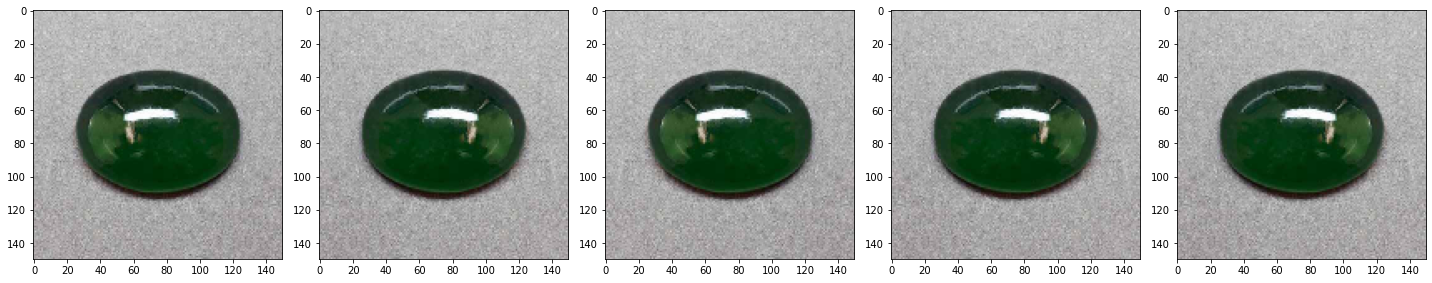

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [7]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

Found 2856 images belonging to 87 classes.
Found 2856 images belonging to 87 classes.


In [8]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 2856 images belonging to 87 classes.


In [9]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 363 images belonging to 87 classes.


In [10]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5))

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=50,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)
model.save('/content/drive/MyDrive/AI/gemstone_dataset/final_gemstone.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
24/24 [==============================] - 883s 36s/step - loss: nan - accuracy: 0.0123 - val_loss: nan - val_accuracy: 0.0110
Epoch 2/50
24/24 [==============================] - 24s 1s/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 3/50
24/24 [==============================] - 24s 1s/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 4/50
24/24 [==============================] - 24s 996ms/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 5/50
24/24 [==============================] - 24s 1s/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 6/50
24/24 [==============================] - 25s 1s/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 7/50
24/24 [==============================] - 24s 1s/step - loss: nan - accuracy: 0.0119 - val_loss: nan - val_accuracy: 0.0110
Epoch 8/50
24/24 [==============================] - 25s 1

In [13]:
 train_data_gen.class_indices

{'Alexandrite': 0,
 'Almandine': 1,
 'Amazonite': 2,
 'Amber': 3,
 'Amethyst': 4,
 'Ametrine': 5,
 'Andalusite': 6,
 'Andradite': 7,
 'Aquamarine': 8,
 'Aventurine Green': 9,
 'Aventurine Yellow': 10,
 'Benitoite': 11,
 'Beryl Golden': 12,
 'Bixbite': 13,
 'Bloodstone': 14,
 'Blue Lace Agate': 15,
 'Carnelian': 16,
 'Cats Eye': 17,
 'Chalcedony': 18,
 'Chalcedony Blue': 19,
 'Chrome Diopside': 20,
 'Chrysoberyl': 21,
 'Chrysocolla': 22,
 'Chrysoprase': 23,
 'Citrine': 24,
 'Coral': 25,
 'Danburite': 26,
 'Diamond': 27,
 'Diaspore': 28,
 'Dumortierite': 29,
 'Emerald': 30,
 'Fluorite': 31,
 'Garnet Red': 32,
 'Goshenite': 33,
 'Grossular': 34,
 'Hessonite': 35,
 'Hiddenite': 36,
 'Iolite': 37,
 'Jade': 38,
 'Jasper': 39,
 'Kunzite': 40,
 'Kyanite': 41,
 'Labradorite': 42,
 'Lapis Lazuli': 43,
 'Larimar': 44,
 'Malachite': 45,
 'Moonstone': 46,
 'Morganite': 47,
 'Onyx Black': 48,
 'Onyx Green': 49,
 'Onyx Red': 50,
 'Opal': 51,
 'Pearl': 52,
 'Peridot': 53,
 'Prehnite': 54,
 'Pyrite': 5

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

kết quả dự đoán :  Alexandrite


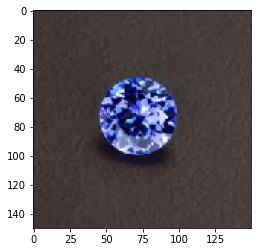

In [16]:
img = load_img('/content/drive/MyDrive/AI/gemstone_dataset/pic/gem.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
gemstone = ['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green',
            'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony',
            'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 
            'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite',
            'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 
            'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky',
            'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 
            'Serpentine', 'Sodalite', 'Spessartite', 'Sphene', 'Spinel', 'Spodumene', 'Sunstone', 'Tanzanite', 'Tigers Eye', 'Topaz', 'Tourmaline', 
            'Tsavorite', 'Turquoise', 'Variscite', 'Zircon', 'Zoisite']
print('kết quả dự đoán : ',gemstone[int(np.argmax(model.predict(img),axis=-1))])